<a href="https://colab.research.google.com/github/aldrick-t/puzzlebot-emdial/blob/dev-final/train/TLRecogni_train_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -r puzzlebot_emdial_vision.v5i.yolov8

In [ ]:
!unzip puzzlebot_emdial_vision.v5i.yolov8.zip -d .

In [ ]:
!rm -r __MACOSX/

In [ ]:
!rm -r runs/

rm: cannot remove 'runs/': No such file or directory


In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
from ultralytics import settings

In [ ]:
model = YOLO('yolov8n.yaml')

In [ ]:
model.train(
    data='data.yaml',       # uses your train/val/test dirs
    epochs=100,
    imgsz=(120, 160),       # (height, width)
    batch=32,                # smaller batch to fit T4's 15 GB
    device=0,               # GPU 0 on Colab
    workers=4,              # reduce parallel loaders
    patience=10,             # early stop if no improvement

    # enable default augmentations
    augment=True,

    # (optional) custom augmentation strengths:
     mosaic=1.0,          # enable mosaic
    # mixup=0.5,           # enable mixup
    # hsv_h=0.015,         # hue jitter
    # hsv_s=0.7,           # saturation jitter
    # hsv_v=0.4,           # value jitter
     degrees=5.0,         # ±5° rotation
     translate=0.1,       # ±10% translation
     scale=0.5,           # ±50% scale
    # shear=0.0,
    # perspective=0.0,
     flipud=0.0,          # no vertical flips
     fliplr=0.8,          # 50% horizontal flips
)

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=5.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.8, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=(120, 160), int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile

100%|██████████| 755k/755k [00:00<00:00, 19.0MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n summary: 129 layers, 3,011,433 parameters, 3,011,417 gradients, 8.2 GFLOPs

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 99.9MB/s]


AMP: checks passed ✅
WARNING ⚠️ updating to 'imgsz=160'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1.6±1.6 MB/s, size: 3.3 KB)


train: Scanning /content/train/labels... 2932 images, 727 backgrounds, 0 corrupt: 100%|██████████| 2932/2932 [00:01<00:00, 1875.69it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1.3±1.3 MB/s, size: 3.6 KB)


val: Scanning /content/valid/labels... 371 images, 78 backgrounds, 0 corrupt: 100%|██████████| 371/371 [00:00<00:00, 888.61it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 160 train, 160 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150     0.336G      3.677      13.22      2.183         24        160: 100%|██████████| 92/92 [00:15<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        371        298          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150     0.363G      4.278      5.075      1.893         16        160: 100%|██████████| 92/92 [00:12<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.07it/s]


                   all        371        298   0.000925     0.0111   7.57e-05   1.93e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150     0.383G      3.454      3.346      1.515         29        160: 100%|██████████| 92/92 [00:12<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.78it/s]


                   all        371        298     0.0749      0.267     0.0562     0.0142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150     0.398G      2.712      2.392      1.256         23        160: 100%|██████████| 92/92 [00:12<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.98it/s]

                   all        371        298      0.333      0.293      0.227     0.0547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150     0.414G      2.443       2.05      1.208         28        160: 100%|██████████| 92/92 [00:12<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.69it/s]

                   all        371        298      0.607      0.621      0.608       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150     0.432G      2.207      1.666      1.139         28        160: 100%|██████████| 92/92 [00:12<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.78it/s]

                   all        371        298      0.611      0.564       0.59      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150     0.449G      2.129      1.574      1.089         24        160: 100%|██████████| 92/92 [00:12<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.86it/s]

                   all        371        298      0.801      0.709      0.784      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150     0.467G      2.069      1.424      1.073         24        160: 100%|██████████| 92/92 [00:12<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.69it/s]


                   all        371        298      0.766      0.634      0.712      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150     0.484G      1.964      1.281      1.037         25        160: 100%|██████████| 92/92 [00:12<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.51it/s]

                   all        371        298       0.83      0.735      0.821      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150       0.5G      1.917      1.237      1.031         25        160: 100%|██████████| 92/92 [00:12<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.64it/s]

                   all        371        298      0.935      0.743      0.851      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150     0.518G      1.854      1.166      1.017         31        160: 100%|██████████| 92/92 [00:11<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]

                   all        371        298      0.905      0.788      0.873      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150     0.533G      1.846      1.161      1.009         29        160: 100%|██████████| 92/92 [00:12<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.90it/s]

                   all        371        298      0.878      0.798      0.857      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150     0.551G      1.791      1.087     0.9978         16        160: 100%|██████████| 92/92 [00:12<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.01it/s]

                   all        371        298      0.933      0.853      0.911      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150     0.568G      1.787      1.081     0.9927         28        160: 100%|██████████| 92/92 [00:12<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.36it/s]

                   all        371        298      0.901      0.781      0.846      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150     0.586G      1.745      1.009     0.9762         28        160: 100%|██████████| 92/92 [00:12<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.90it/s]

                   all        371        298      0.895      0.833      0.917      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150     0.602G      1.725      1.014     0.9881         28        160: 100%|██████████| 92/92 [00:12<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.80it/s]

                   all        371        298      0.891      0.844      0.901      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150     0.619G      1.718      1.012     0.9824         21        160: 100%|██████████| 92/92 [00:12<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.58it/s]

                   all        371        298      0.909      0.834      0.897       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150     0.637G      1.672     0.9702     0.9718         29        160: 100%|██████████| 92/92 [00:13<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.81it/s]

                   all        371        298       0.81      0.749       0.85      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150     0.654G      1.636     0.9542     0.9659         27        160: 100%|██████████| 92/92 [00:12<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.90it/s]

                   all        371        298      0.927      0.891      0.945      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      0.67G      1.619     0.9234     0.9594         25        160: 100%|██████████| 92/92 [00:12<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.09it/s]

                   all        371        298      0.882       0.78       0.88      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150     0.688G      1.645     0.9205     0.9535         28        160: 100%|██████████| 92/92 [00:12<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.43it/s]

                   all        371        298      0.931      0.885      0.938      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150     0.703G      1.604     0.9228     0.9598         28        160: 100%|██████████| 92/92 [00:12<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.98it/s]

                   all        371        298      0.953      0.909      0.946       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150     0.721G      1.597     0.8881     0.9463         27        160: 100%|██████████| 92/92 [00:12<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.92it/s]

                   all        371        298      0.922      0.906      0.944      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150     0.738G      1.578     0.8582      0.947         19        160: 100%|██████████| 92/92 [00:12<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.00it/s]

                   all        371        298      0.923      0.904      0.941      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150     0.756G      1.568     0.8536     0.9421         28        160: 100%|██████████| 92/92 [00:12<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.84it/s]

                   all        371        298      0.946      0.894      0.942      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150     0.771G      1.576     0.8839     0.9456         23        160: 100%|██████████| 92/92 [00:12<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.90it/s]

                   all        371        298      0.939      0.925      0.952      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150     0.789G      1.564     0.8666     0.9439         21        160: 100%|██████████| 92/92 [00:12<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.97it/s]

                   all        371        298      0.965      0.918      0.955       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150     0.807G      1.524     0.8357     0.9364         18        160: 100%|██████████| 92/92 [00:12<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.95it/s]

                   all        371        298      0.951      0.919      0.964      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150     0.822G       1.52     0.8401     0.9292         24        160: 100%|██████████| 92/92 [00:12<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.95it/s]

                   all        371        298       0.95      0.938      0.971      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      0.84G      1.521     0.8221     0.9318         27        160: 100%|██████████| 92/92 [00:13<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.46it/s]

                   all        371        298      0.983      0.909      0.969      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150     0.857G      1.508     0.7946     0.9308         29        160: 100%|██████████| 92/92 [00:12<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.96it/s]

                   all        371        298      0.931      0.883      0.944       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150     0.875G      1.484     0.8036     0.9312         21        160: 100%|██████████| 92/92 [00:12<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.90it/s]

                   all        371        298      0.982      0.922      0.965      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150     0.891G      1.497     0.8077     0.9228         27        160: 100%|██████████| 92/92 [00:12<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.68it/s]

                   all        371        298      0.948      0.927      0.956      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150     0.908G      1.491     0.8144     0.9235         27        160: 100%|██████████| 92/92 [00:12<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.89it/s]

                   all        371        298      0.977      0.929      0.974      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150     0.926G       1.49     0.7987     0.9238         32        160: 100%|██████████| 92/92 [00:12<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.14it/s]

                   all        371        298      0.943      0.953       0.97      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150     0.941G      1.502     0.7807     0.9235         32        160: 100%|██████████| 92/92 [00:12<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.87it/s]

                   all        371        298      0.972      0.952      0.969      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150     0.959G      1.474     0.7847     0.9206         31        160: 100%|██████████| 92/92 [00:12<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.05it/s]

                   all        371        298      0.986      0.952      0.977      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150     0.977G      1.458     0.7696     0.9068         32        160: 100%|██████████| 92/92 [00:12<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.84it/s]

                   all        371        298      0.953       0.92      0.952      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150     0.994G      1.459     0.7777     0.9138         30        160: 100%|██████████| 92/92 [00:12<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.12it/s]

                   all        371        298      0.963      0.933      0.973      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      1.01G      1.461     0.7969     0.9188         15        160: 100%|██████████| 92/92 [00:12<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.52it/s]

                   all        371        298       0.95      0.921      0.967       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      1.03G      1.419     0.7709     0.9086         27        160: 100%|██████████| 92/92 [00:12<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.65it/s]

                   all        371        298      0.955       0.94       0.97      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      1.04G       1.44     0.7636     0.9002         14        160: 100%|██████████| 92/92 [00:11<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all        371        298      0.969      0.956       0.97      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      1.06G      1.412     0.7459     0.9101         28        160: 100%|██████████| 92/92 [00:13<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.07it/s]

                   all        371        298      0.967      0.939      0.975      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      1.08G      1.429     0.7386     0.9043         22        160: 100%|██████████| 92/92 [00:12<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.85it/s]

                   all        371        298      0.973      0.915       0.96      0.546
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 34, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



44 epochs completed in 0.174 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]


                   all        371        298      0.936      0.956       0.97      0.565
              tl_green         97         97      0.948      0.969       0.98      0.594
                tl_red         69         71      0.914      0.944      0.957      0.568
             tl_yellow        130        130      0.946      0.954      0.973      0.534
Speed: 0.0ms preprocess, 2.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f7d158c7090>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04


WARNING ⚠️ imgsz=[120, 160] must be multiple of max stride 32, updating to [128, 160]
0: 128x160 1 tl_red, 23.8ms
Speed: 0.7ms preprocess, 23.8ms inference, 1.5ms postprocess per image at shape (1, 3, 128, 160)


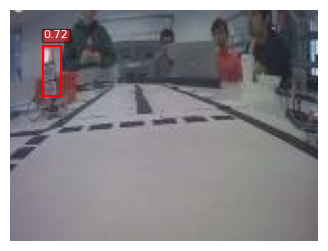

In [ ]:
import random, matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

# pick one test image
test_files = [f for f in os.listdir('test/images/') if f.endswith('.jpg')]
f = random.choice(test_files)
img = Image.open(f'test/images/{f}').convert('RGB')

# run prediction
results = model.predict(
    source=img,
    imgsz=(120,160),
    conf=0.25,
    device=0
)[0]

# plot
fig, ax = plt.subplots(1, figsize=(4,3))
ax.imshow(img.resize((160,120)))
for *box, conf, cls in results.boxes.data.cpu().numpy():
    x1,y1,x2,y2 = box
    rect = patches.Rectangle((x1,y1), x2-x1, y2-y1,
                             linewidth=1.5, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(x1, y1-4, f"{conf:.2f}", color='white',
            bbox=dict(facecolor='red', alpha=0.5, pad=1), fontsize=8)
ax.axis('off')
plt.show()

In [ ]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU
benchmark(model="yolov8n.yaml", data="data.yaml", imgsz=160, half=False, device=0)

Setup complete ✅ (2 CPUs, 12.7 GB RAM, 49.6/112.6 GB disk)

Benchmarks complete for yolov8n.yaml on data.yaml at imgsz=160 (372.27s)
Benchmarks legend:  - ✅ Success  - ❎ Export passed but validation failed  - ❌️ Export failed
                   Format Status❔  Size (MB) metrics/mAP50-95(B) Inference time (ms/im)     FPS
0                 PyTorch       ❌        0.0                   -                      -       -
1             TorchScript       ✅       12.4                 0.0                   5.53  180.67
2                    ONNX       ✅       12.1                 0.0                   4.83  206.81
3                OpenVINO       ❌        0.0                   -                      -       -
4                TensorRT       ✅       14.1                 0.0                   2.11  474.32
5                  CoreML       ❌        0.0                   -                      -       -
6   TensorFlow SavedModel       ❎       30.5                   -                      -       -
7     

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im),FPS
0,PyTorch,❌,0.0,NaN,NaN,NaN
1,TorchScript,✅,12.4,0.0,5.53,180.67
2,ONNX,✅,12.1,0.0,4.83,206.81
3,OpenVINO,❌,0.0,NaN,NaN,NaN
4,TensorRT,✅,14.1,0.0,2.11,474.32
5,CoreML,❌,0.0,NaN,NaN,NaN
6,TensorFlow SavedModel,❎,30.5,NaN,NaN,NaN
7,TensorFlow GraphDef,❎,12.2,NaN,NaN,NaN
8,TensorFlow Lite,❌,0.0,NaN,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN,NaN
